## Overview Exercises

*For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.*

## Has the network latency gone up since we switched internet service providers?

**H0:** Network latency has remained the same since we switched internet service providers.

**Ha:** Network latency has gone up since we switched internet service providers. 

True Positive: We conclude that latency has gone up since switching providers and that is actually the case.

True Negative: We conclude that latency has remained the same since the switch and that is actually the case. 

Type I Error: We reject the our null hypothesis that latency has remaine the same when latency has indeed remained the same. 

Type II Error: We don't reject our null hypothesis and conclude that there is no latency difference when latency really did go up or there was a change. 


## Is the website redesign any good?

**H0:** The new website design doesn't attract any more traffic than the old one.

**Ha:** The new website design increases traffic. 

True Positive: We conclude that there is an increase in traffic and that is actually the case.

True Negative: We conclude that website traffic has remained the same and that is actually the case. 

Type I Error: We reject our null hypothesis that the redesign doesn't attract more traffic than the old one when in fact there is no change in website traffic. 

Type II Error: We don't reject our null hypothesis, and conclude that there is no traffic change when in fact there was a change. 

## Is our television ad driving more sales?

**H0:** The television add didn't increase sales. 

**Ha:** The television add caused an increase in sales. 

True Positive: We conclude that the ad caused an increase in sales and that is actually the case. 

True Negative: We conclude that the television ad did not increase sales and that is actually the case.

Type I Error: We reject our null hypothesis that the ad is didn't increase sales when it did not increase sales.

Type II Error: We don't reject the null hypothesis when the ad did causse a change in sales. 

## T-Test Exercises

- *Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.*



In [53]:
import math
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pydataset import data
import statistics 

**My Hypotheses**

- $H0$: There is no difference in average time to sell between the two offices.

- $Ha$: There is a difference in average time to sell between the two offices. 

<AxesSubplot:>

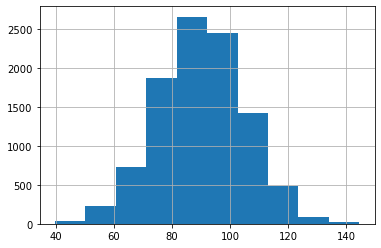

In [77]:
#Office 1 Normal Distribution
office_1 = pd.Series(stats.norm(90, 15).rvs(10_000))
office_1.hist()

<AxesSubplot:>

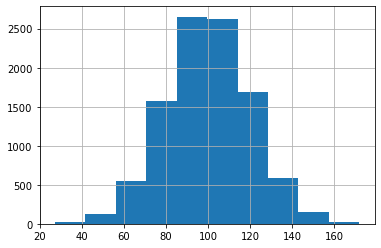

In [78]:
#Office 2 Normal Distribution
office_2 = pd.Series(stats.norm(100, 20).rvs(10_000))
office_2.hist()

In [15]:
#Both Distributions
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

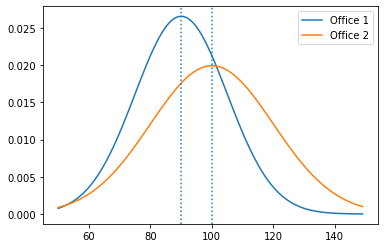

In [79]:
plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')

plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':')

plt.legend()
plt.show()

In [80]:
#T-Test using Scipy
a= .05

t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p


(-2.7091418459143854, 0.00811206270346016)

In [87]:
# Becuase it is a 2-tailed test
if p < a: 
    print('We reject H0.')
else: 
    print('We fail to reject H0.')

We fail to reject H0.


- **Load the mpg dataset and use it to answer the following questions:**

*Is there a difference in fuel-efficiency in cars from 2008 vs 1999?*

**My Hypotheses**

- $H0$: There is no difference in fuel-efficiency in cars from 2008 vs 1999. 

- $Ha$: There is a difference in fuel-efficiency in cars from 2008 vs 1999. 

In [62]:
# Load the data set
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [63]:
# Create column with combined average gas mileage
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [65]:
# Create my subgroups
mpg_2008 = mpg[mpg.year == 2008].avg_mpg

mpg_1999 = mpg[mpg.year == 1999].avg_mpg

117

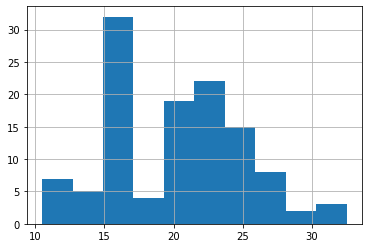

In [94]:
# mpg_2008 distribution -- approximately normal
mpg_2008.hist()
mpg_2008.count()

117

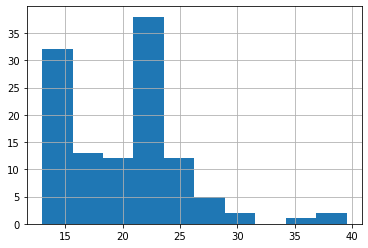

In [93]:
#mpg_1999 distribution - aprroximately normal
mpg_1999.hist()
mpg_1999.count()

In [68]:
# Compate the variance of both samples
mpg_2008.var(), mpg_1999.var()
# Roughly the same

(24.097480106100797, 27.122605363984682)

In [35]:
stats.levene(mpg_2008, mpg_1999)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [84]:
# calculate t-statistic and p value 
alpha = .05
t, p = stats.ttest_ind(mpg_2008, mpg_1999)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [88]:
# Because it is a 2-tailed test
if p < alpha: 
    print('We reject H0.')
else: 
    print('We fail to reject H0.')

We fail to reject H0.


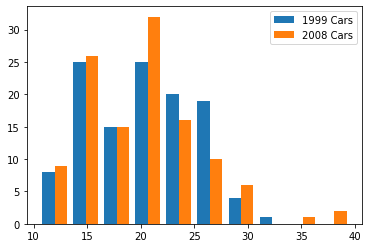

In [86]:
# Visualized 
plt.hist([mpg_2008, mpg_1999], label =['1999 Cars', '2008 Cars'])
plt.legend()

- *Are compact cars more fuel-efficient than the average car?*


**My Hypotheses:**

- $H0$: There is no difference in fuel efficiency between compact cars and the average car. 

- $Ha$: Compact cars ae more fuel efficient than the average car. 

In [90]:
# Create subgroup representing compact car fuel efficiency 
compact_mpg = mpg[mpg['class'] == 'compact'].avg_mpg
compact_mpg.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

In [89]:
# Create variable representing average fuel efficiency of all cars in the population.

population_avg = mpg.avg_mpg.mean()
population_avg

20.14957264957265

47

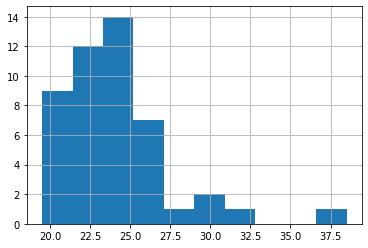

In [92]:
# Approximately Normal Distribution for our subgroup
compact_mpg.hist()
compact_mpg.count()

In [96]:
# Conduct our t-test
t, p = stats.ttest_1samp(compact_mpg, population_avg)
t, p

(7.896888573132535, 4.1985637943171336e-10)

In [97]:
# Because it is a 1 sample test
if p/2 < alpha: 
    print('We reject H0.')
else: 
    print('We fail to reject H0.')

We reject H0.


- Do manual cars get better gas mileage than automatic cars?

H0: There is no difference in gas mileage between manual and automatic cars.

Ha: Manual cars get better gas mileage than automatic cars. 

In [45]:
mpg_auto= mpg[mpg.trans.str.contains('auto')].avg_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg

157

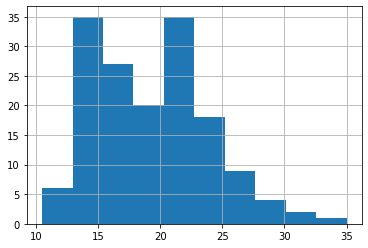

In [98]:
# Approximately normal distribution 
mpg_auto.hist()
mpg_auto.count()

77

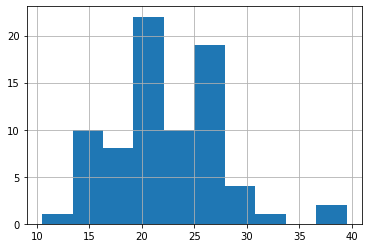

In [99]:
# Approximately normal distribution
mpg_manual.hist()
mpg_manual.count()

In [100]:
# Comparing variances
mpg_auto.var(), mpg_manual.var()

(21.942777233382337, 26.635167464114826)

In [101]:
#Levene test to check for unequal variances
stats.levene(mpg_auto, mpg_manual)

# p value above .05, so I can't assert a difference in variance

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [102]:
# Conduct our t-test
t, p = stats.ttest_ind(mpg_manual, mpg_auto)
t, p, alpha

(4.593437735750014, 7.154374401145683e-06, 0.05)

In [103]:
#Because it's a 1 sample test

if p/2 < alpha: 
    print('We reject H0.')
else: 
    print('We fail to reject H0.')

We reject H0.


## Correlation Exercises